In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


import time
import math
import random
import re
import os
import sys


from utils.util import find_files_with_extension
from utils.util import  get_dataframe_from_filepath,calculate_statistics, extract_unique_mbps_and_ms
from utils.util import remove_outliers_iqr, comma_format, create_directory_if_not_exists,print_rtt_stats,save_rtt_stats

In [2]:
# Load data
mainpth="./Data"

graph_directory = os.path.join(mainpth, "Graphs")
create_directory_if_not_exists(graph_directory)

stats_directory = os.path.join(mainpth, "Stats")
create_directory_if_not_exists(graph_directory)


folderpaths = [mainpth+'./client1_data',mainpth+'./client2_data']
filenames, filepaths, filedict = find_files_with_extension(folderpaths, '.log')


Directory already exists: ./Data\Graphs
Directory already exists: ./Data\Graphs


In [3]:
filedict

{'1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log',
 '1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log',
 '1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log',
 '2_2_fq_codel_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\2_2_fq_codel_10Mbps_1ms_newreno_src1.siftr.log',
 '2_2_fq_pie_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\2_2_fq_pie_10Mbps_1ms_newreno_src1.siftr.log',
 '2_2_l4s_10Mbps_1ms_newreno_src1.siftr.log': './Data./client1_data\\2_2_l4s_10Mbps_1ms_newreno_src1.siftr.log',
 '1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log': './Data./client2_data\\1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log',
 '1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log': './Data./client2_data\\1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log',
 '1_1_l4s_10Mbps_1ms_dctcp_src2.siftr.log': './Data./cli

In [4]:
# Call the function and print unique combinations
unique_combinations = extract_unique_mbps_and_ms(folderpaths)
print("Unique Mbps and ms Combinations:")
for mbps, ms in sorted(unique_combinations):
    print(f'{mbps} Mbps, {ms} ms')


Unique Mbps and ms Combinations:
10 Mbps, 1 ms


In [5]:
mbps , ms = list(unique_combinations)[0]
net_settings = f'{mbps}_Mbps_{ms}_ms'
print(net_settings)

10_Mbps_1_ms


In [6]:
df=get_dataframe_from_filepath(filepaths[0])
df['ForeignPort'].unique()

./Data./client1_data\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log


array(['57298', '57260', '57214', '5101', '57224', '5102', '57212'],
      dtype=object)

In [7]:
unique_scenarios_dict={}
for index in range(len(filenames)):
    scenario = "_".join(filenames[index].split('_')[:4])
    if "l4s" in scenario:
        scenario = "_".join(filenames[index].split('_')[:3])
    if scenario in unique_scenarios_dict:
        unique_scenarios_dict[scenario].append(filedict[filenames[index]])
    else:
        unique_scenarios_dict[scenario]=[filedict[filenames[index]]]


In [8]:
unique_scenarios_dict

{'1_1_fq_codel': ['./Data./client1_data\\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log'],
 '1_1_fq_pie': ['./Data./client1_data\\1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log'],
 '1_1_l4s': ['./Data./client1_data\\1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\1_1_l4s_10Mbps_1ms_dctcp_src2.siftr.log'],
 '2_2_fq_codel': ['./Data./client1_data\\2_2_fq_codel_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\2_2_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log'],
 '2_2_fq_pie': ['./Data./client1_data\\2_2_fq_pie_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\2_2_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log'],
 '2_2_l4s': ['./Data./client1_data\\2_2_l4s_10Mbps_1ms_newreno_src1.siftr.log',
  './Data./client2_data\\2_2_l4s_10Mbps_1ms_dctcp_src2.siftr.log']}

In [9]:
from utils.plotter import  plot_siftr_graph

1_1_l4s
./Data./client1_data\1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_l4s_10Mbps_1ms_dctcp_src2.siftr.log
['57254' '57300' '57276' '5101' '57280' '5102' '57250']
['57204' '57302' '57256' '5103' '57266']

Saving RTT statistics to ./Data\Stats/scn_1_1_l4s_10_Mbps_1_ms_rtt_stats.txt



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


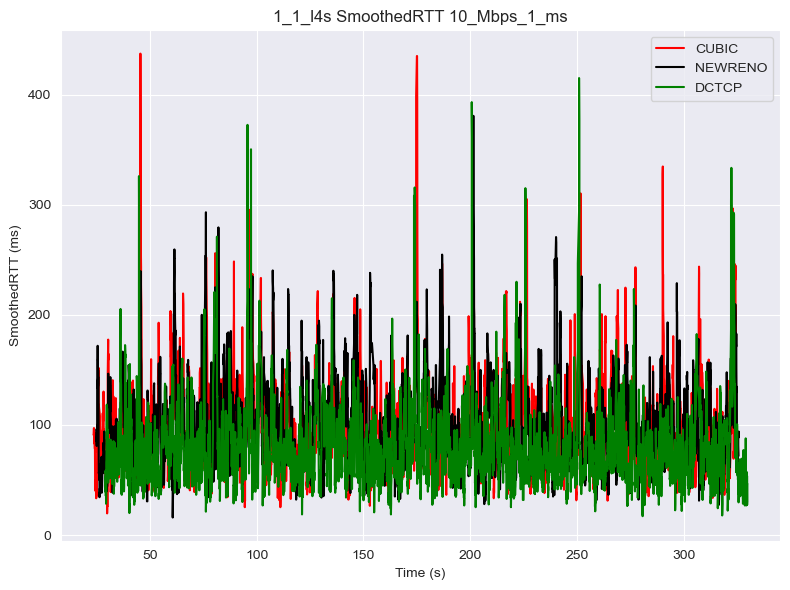

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


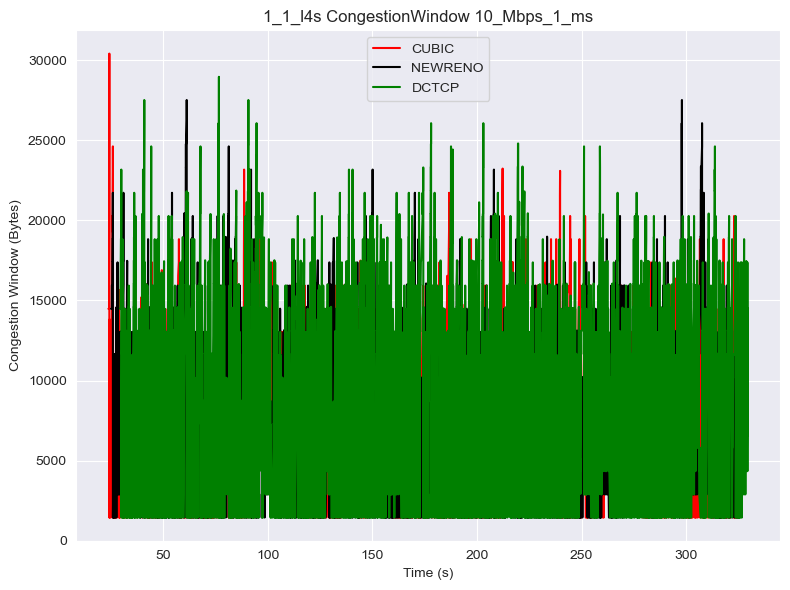

In [10]:
scenario = list(unique_scenarios_dict.keys())[2]


tcp1 = "CUBIC"
tcp2 = "NEWRENO"
tcp3 = "DCTCP"

print(scenario)

classif_traffic = unique_scenarios_dict[scenario][0]
l4s_traffic = unique_scenarios_dict[scenario][1]

ctf = get_dataframe_from_filepath(classif_traffic)
ltf = get_dataframe_from_filepath(l4s_traffic)


# print(ctf.head(2))

# print(ltf.head(2))


print(ctf['ForeignPort'].unique())

print(ltf['ForeignPort'].unique())

ctf1 = ctf[ctf['ForeignPort'] == "5101"]
ctf2 = ctf[ctf['ForeignPort'] == "5102"]
ltf =  ltf[ltf['ForeignPort'] == "5103"]

# Define paths
paths = {
    tcp1: ctf1,
    tcp2: ctf2,
    tcp3: ltf,
}

# print_rtt_stats(paths=paths,scenario=scenario+"_"+net_settings)

save_rtt_stats(paths=paths,scenario=scenario+"_"+net_settings,stats_directory=stats_directory)



plot_siftr_graph(paths=paths,
                ycolumn="SmoothedRTT",
                title=f"{scenario} SmoothedRTT {net_settings}",
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'{scenario}_{net_settings}_SmoothedRTT',
                graph_directory=graph_directory,
)




plot_siftr_graph(paths=paths,
                ycolumn="CongestionWindow",
                title=f"{scenario} CongestionWindow {net_settings}",
                xlabel="Time (s)",
                ylabel="Congestion Window (Bytes)",
                filename=f'{scenario}_{net_settings}_CWND',
                graph_directory=graph_directory,
)





Start New Scenario
1_1_fq_codel
./Data./client1_data\1_1_fq_codel_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log

RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*
RTT statistics for scenario 1_1_fq_codel_10_Mbps_1_ms:
Statistics for CUBIC:
Median: 39.687
Mean: 41.963914518208185
25th Percentile: 31.875
75th Percentile: 49.062
Minimum: 12.187
Maximum: 142.5
Statistics for NEWRENO:
Median: 39.375
Mean: 41.91721628767848
25th Percentile: 31.562
75th Percentile: 48.75
Minimum: 13.125
Maximum: 160.0
Statistics for DCTCP:
Median: 36.562
Mean: 39.61897755117571
25th Percentile: 29.375
75th Percentile: 46.25
Minimum: 12.187
Maximum: 166.875
END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*


Saving RTT statistics to ./Data\Stats/scn_1_1_fq_codel_10_Mbps_1_ms_rtt_stats.txt



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


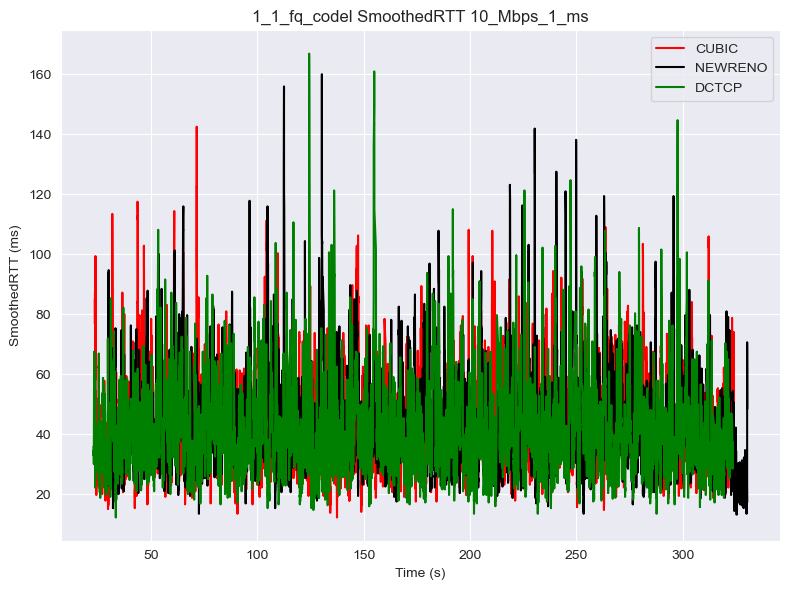

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


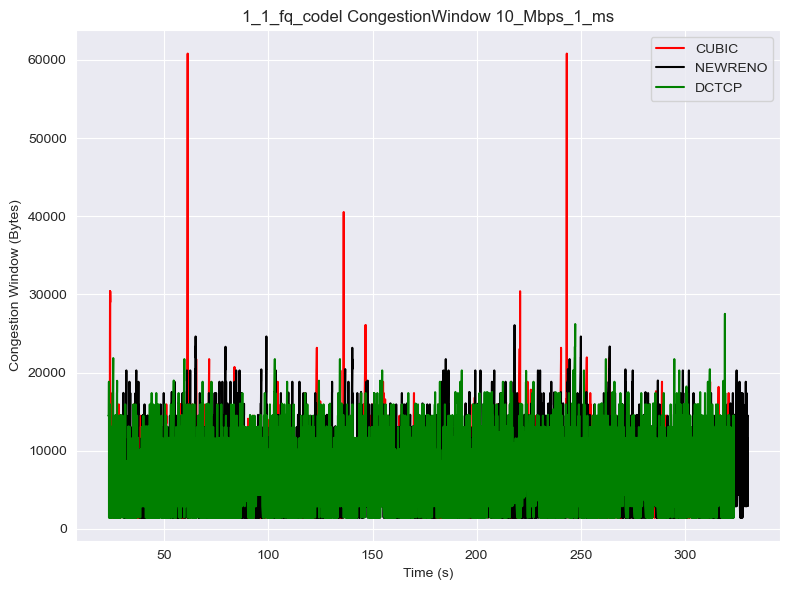


Start New Scenario
1_1_fq_pie
./Data./client1_data\1_1_fq_pie_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log

RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*
RTT statistics for scenario 1_1_fq_pie_10_Mbps_1_ms:
Statistics for CUBIC:
Median: 77.812
Mean: 98.42304490803406
25th Percentile: 60.0
75th Percentile: 105.312
Minimum: 20.0
Maximum: 672.812
Statistics for NEWRENO:
Median: 77.3435
Mean: 96.38779520811471
25th Percentile: 59.687
75th Percentile: 105.312
Minimum: 20.312
Maximum: 711.562
Statistics for DCTCP:
Median: 74.687
Mean: 94.24122037472624
25th Percentile: 56.562
75th Percentile: 102.187
Minimum: 20.625
Maximum: 818.75
END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*


Saving RTT statistics to ./Data\Stats/scn_1_1_fq_pie_10_Mbps_1_ms_rtt_stats.txt



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


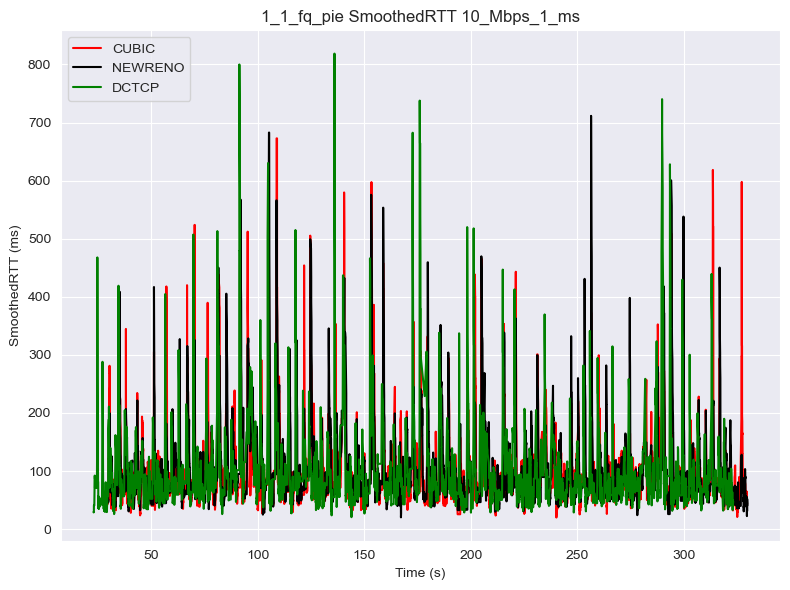

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


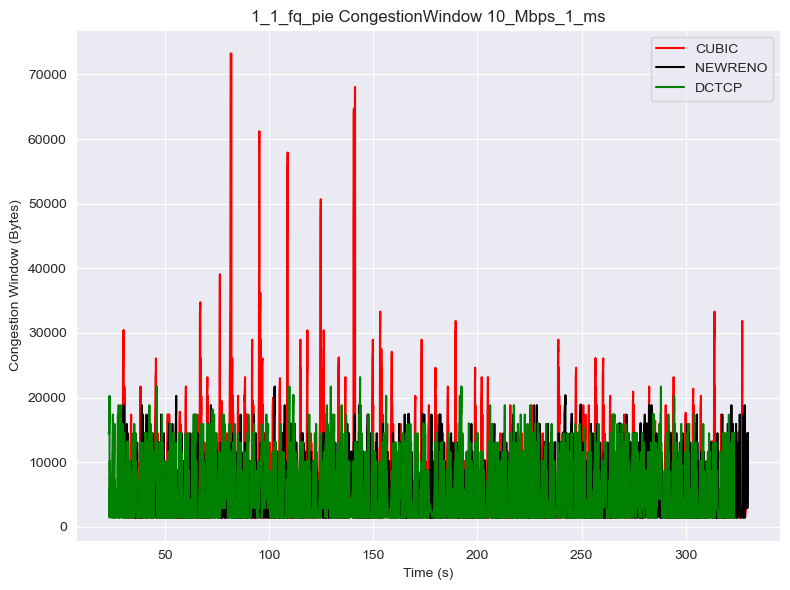


Start New Scenario
1_1_l4s
./Data./client1_data\1_1_l4s_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\1_1_l4s_10Mbps_1ms_dctcp_src2.siftr.log

RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*
RTT statistics for scenario 1_1_l4s_10_Mbps_1_ms:
Statistics for CUBIC:
Median: 85.625
Mean: 93.03962271593014
25th Percentile: 66.562
75th Percentile: 110.937
Minimum: 19.687
Maximum: 437.187
Statistics for NEWRENO:
Median: 86.562
Mean: 93.34024669823074
25th Percentile: 65.781
75th Percentile: 113.125
Minimum: 15.937
Maximum: 380.625
Statistics for DCTCP:
Median: 66.562
Mean: 73.96367466086657
25th Percentile: 53.125
75th Percentile: 86.875
Minimum: 17.187
Maximum: 415.0
END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*


Saving RTT statistics to ./Data\Stats/scn_1_1_l4s_10_Mbps_1_ms_rtt_stats.txt



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


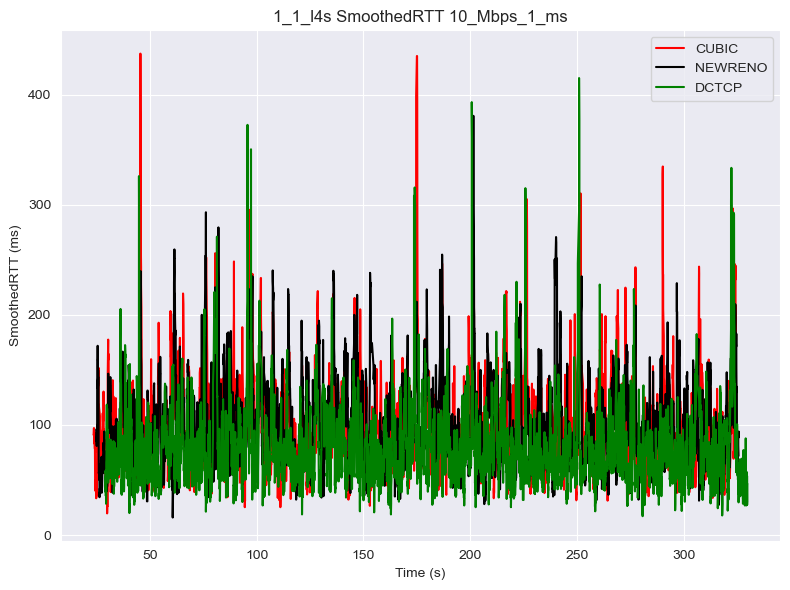

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


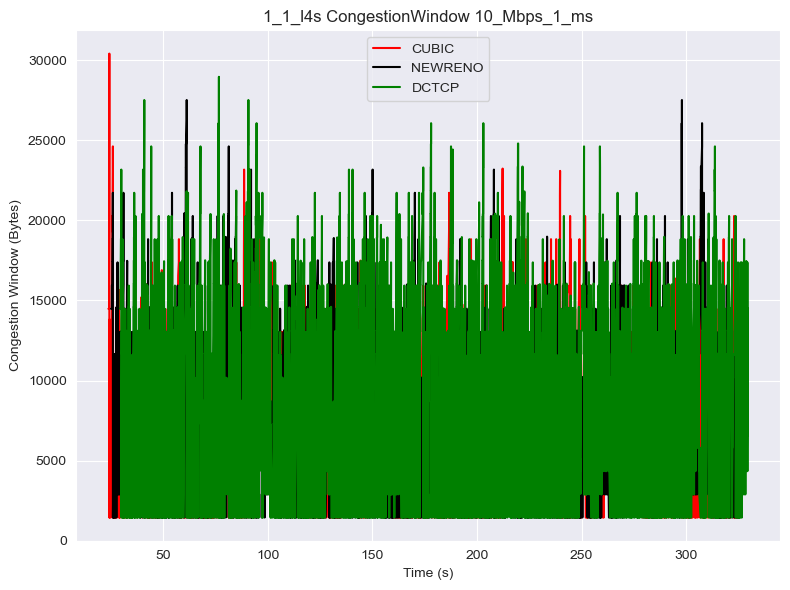


Start New Scenario
2_2_fq_codel
./Data./client1_data\2_2_fq_codel_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\2_2_fq_codel_10Mbps_1ms_dctcp_src2.siftr.log

RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*
RTT statistics for scenario 2_2_fq_codel_10_Mbps_1_ms:
Statistics for CUBIC:
Median: 29.687
Mean: 30.720232830133373
25th Percentile: 24.375
75th Percentile: 35.312
Minimum: 9.687
Maximum: 98.437
Statistics for NEWRENO:
Median: 42.812
Mean: 48.75909615384615
25th Percentile: 34.687
75th Percentile: 58.75
Minimum: 17.812
Maximum: 120.0
Statistics for DCTCP:
Median: 29.062
Mean: 30.327710056595564
25th Percentile: 24.687
75th Percentile: 34.375
Minimum: 10.937
Maximum: 103.75
END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*


Saving RTT statistics to ./Data\Stats/scn_2_2_fq_codel_10_Mbps_1_ms_rtt_stats.txt



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


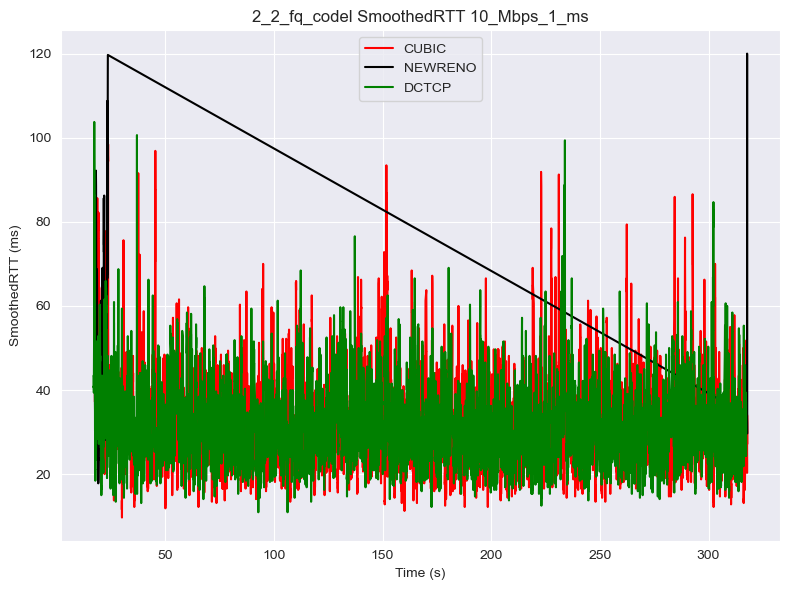

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


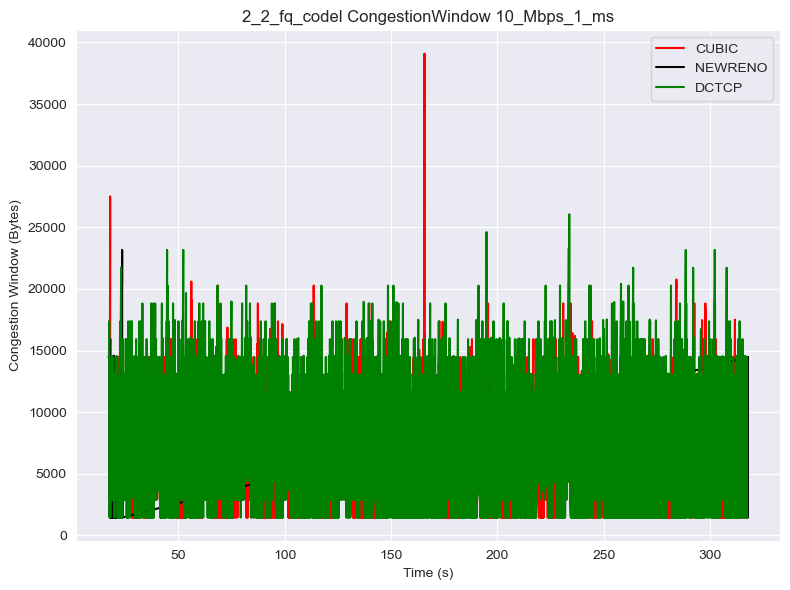


Start New Scenario
2_2_fq_pie
./Data./client1_data\2_2_fq_pie_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\2_2_fq_pie_10Mbps_1ms_dctcp_src2.siftr.log

RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*
RTT statistics for scenario 2_2_fq_pie_10_Mbps_1_ms:
Statistics for CUBIC:
Median: 70.625
Mean: 88.93991163841808
25th Percentile: 56.562
75th Percentile: 93.75
Minimum: 19.687
Maximum: 672.812
Statistics for NEWRENO:
Median: 74.687
Mean: 90.21702537266094
25th Percentile: 58.125
75th Percentile: 97.187
Minimum: 24.375
Maximum: 640.312
Statistics for DCTCP:
Median: 70.0
Mean: 85.23867540039856
25th Percentile: 53.125
75th Percentile: 94.687
Minimum: 18.437
Maximum: 808.125
END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*


Saving RTT statistics to ./Data\Stats/scn_2_2_fq_pie_10_Mbps_1_ms_rtt_stats.txt



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


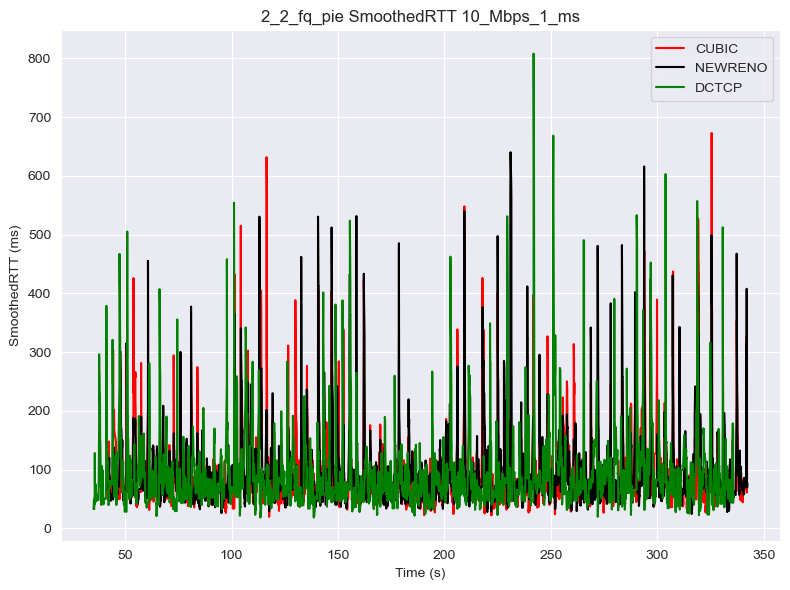

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


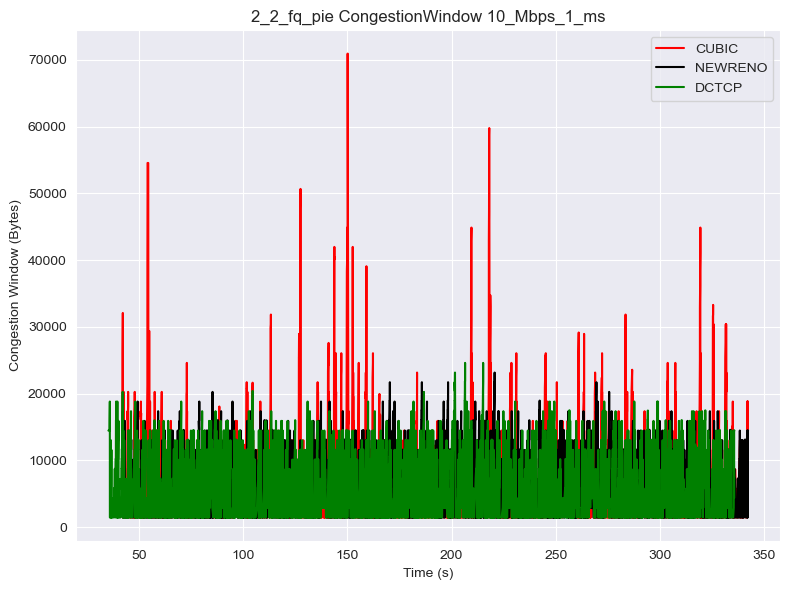


Start New Scenario
2_2_l4s
./Data./client1_data\2_2_l4s_10Mbps_1ms_newreno_src1.siftr.log
./Data./client2_data\2_2_l4s_10Mbps_1ms_dctcp_src2.siftr.log

RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*RTT *-*-*
RTT statistics for scenario 2_2_l4s_10_Mbps_1_ms:
Statistics for CUBIC:
Median: 85.312
Mean: 92.72971075522314
25th Percentile: 66.875
75th Percentile: 109.687
Minimum: 26.25
Maximum: 309.062
Statistics for NEWRENO:
Median: 84.062
Mean: 92.16016792798534
25th Percentile: 65.937
75th Percentile: 109.687
Minimum: 14.062
Maximum: 364.062
Statistics for DCTCP:
Median: 65.625
Mean: 72.60979652351739
25th Percentile: 52.5
75th Percentile: 85.0
Minimum: 19.687
Maximum: 321.562
END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*END RTT *-*-*


Saving RTT statistics to ./Data\Stats/scn_2_2_l4s_10_Mbps_1_ms_rtt_stats.txt



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


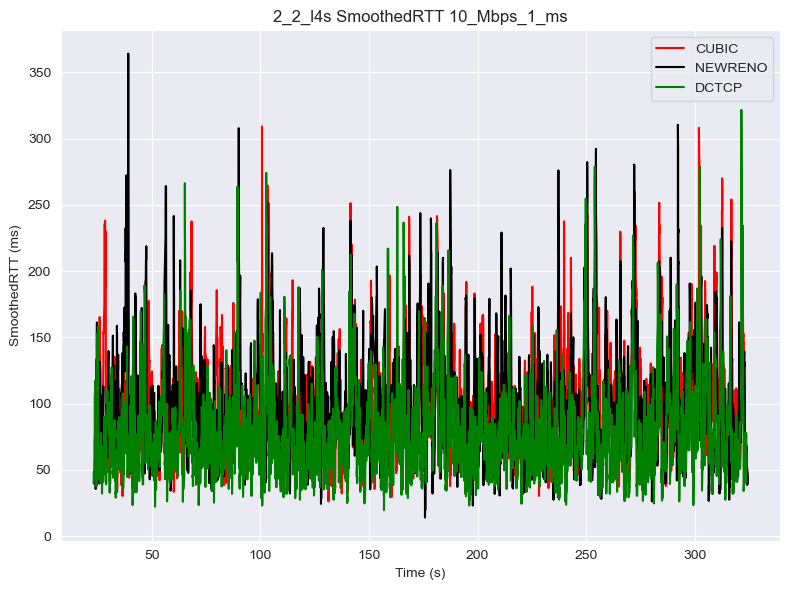

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


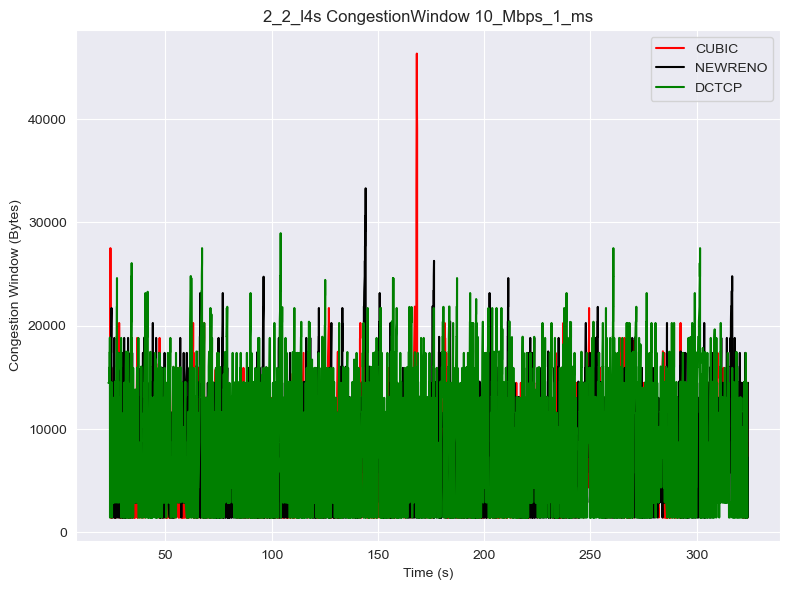

In [11]:
for scenario in unique_scenarios_dict.keys():

    tcp1 = "CUBIC"
    tcp2 = "NEWRENO"
    tcp3 = "DCTCP"
    print()
    print("Start New Scenario")
    print(scenario)

    classif_traffic = unique_scenarios_dict[scenario][0]
    l4s_traffic = unique_scenarios_dict[scenario][1]

    ctf = get_dataframe_from_filepath(classif_traffic)
    ltf = get_dataframe_from_filepath(l4s_traffic)

    ctf1 = ctf[ctf['ForeignPort'] == "5101"]
    ctf2 = ctf[ctf['ForeignPort'] == "5102"]
    ltf =  ltf[ltf['ForeignPort'] == "5103"]

    # Define paths
    paths = {
        tcp1: ctf1,
        tcp2: ctf2,
        tcp3: ltf,
    }

    print_rtt_stats(paths=paths,scenario=scenario+"_"+net_settings)
    save_rtt_stats(paths=paths,scenario=scenario+"_"+net_settings,stats_directory=stats_directory)



    plot_siftr_graph(paths=paths,
                    ycolumn="SmoothedRTT",
                    title=f"{scenario} SmoothedRTT {net_settings}",
                    xlabel="Time (s)",
                    ylabel="SmoothedRTT (ms)",
                    filename=f'{scenario}_{net_settings}_SmoothedRTT',
                    graph_directory=graph_directory,
    )




    plot_siftr_graph(paths=paths,
                    ycolumn="CongestionWindow",
                    title=f"{scenario} CongestionWindow {net_settings}",
                    xlabel="Time (s)",
                    ylabel="Congestion Window (Bytes)",
                    filename=f'{scenario}_{net_settings}_CWND',
                    graph_directory=graph_directory,
    )
